Import libraries<br>
$\lambda=n_{eff}$<br>
$n_g=n_{eff}−\lambda \frac{d\lambda}{dn_{eff}}$


In [5]:
import sys
print(f"Your python version is: {sys.version}")
import gdsfactory as gf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import ubcpdk  # register the PDK
from ubcpdk.cells import ring_single

print("Your gdsfactory version is: ",gf.__version__)
print("Your matplotlib version is: ",matplotlib.__version__)
print("Your numpy version is: ",np.__version__)
print("Your ubcpdk version is: ",ubcpdk.__version__)

Your python version is: 3.11.13 (main, Jun  5 2025, 13:12:00) [GCC 11.2.0]
Your gdsfactory version is:  9.23.0
Your matplotlib version is:  3.10.6
Your numpy version is:  2.3.3
Your ubcpdk version is:  3.3.2


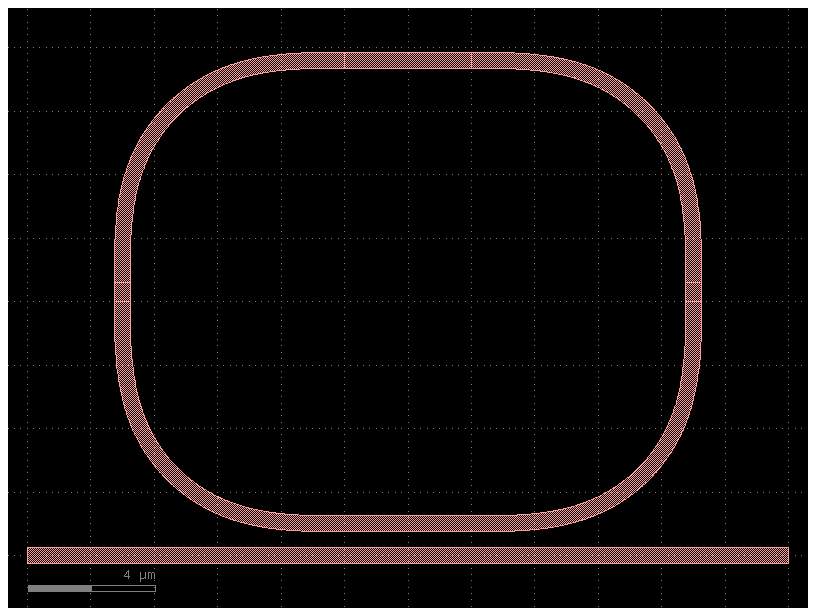

interactive(children=(FloatSlider(value=7.0, description='r', max=10.0, min=5.0, step=0.5), FloatSlider(value=…

In [32]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

# Enable the widget backend for Matplotlib (requires ipympl to be installed)
# %matplotlib widget 
def update_plot_ring(r,g):
    
    ring = ring_single(
    radius=r,  # microns
    gap=g       # microns
    )
    ring.plot()
    return ring
# Create a slider (knob) that calls update_plot with the new value
res=interact(update_plot_ring, r=(5, 10, 0.5),g=(0.1, 1, 0.1));



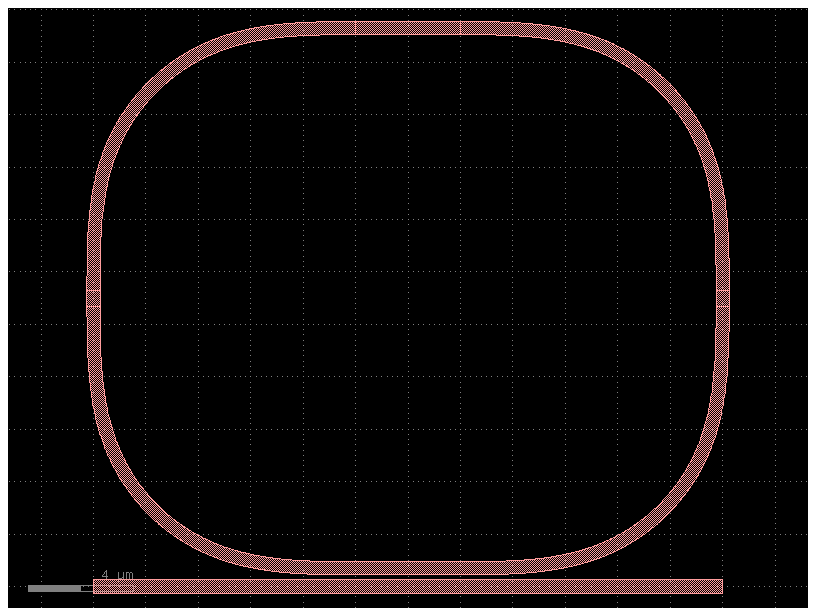

In [26]:
# Create the ring
ring = ring_single(
    radius=10.0,  # microns
    gap=0.2       # microns
)

# Preview the ring
ring.plot()

Estimated FSR ≈ 6.07 nm
Minimum transmission: 0.11612435954321836


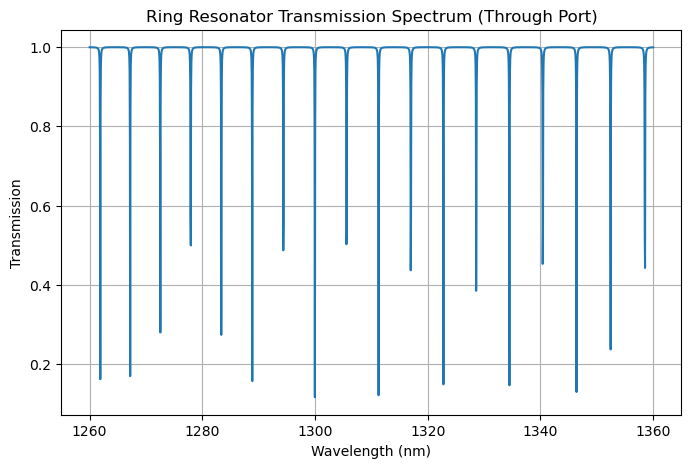

In [3]:
# Ring parameters
R = 10.0        # microns
lambda0 = 1.31  # microns (O-band center)
# ng = 4.0        # approximate group index for silicon in O-band
ng = 4.5        # group index for UBC strip waveguide

L = 2 * np.pi * R  # round-trip length

FSR = lambda0**2 / (ng * L)
print(f"Estimated FSR ≈ {FSR*1000:.2f} nm")


# Ring parameters
R = 20.0                     # microns
neff = 2.4                   # approximate effective index (O-band)
a = 0.99                     # round-trip amplitude loss
k = 0.2                      # power coupling coefficient into ring
t = np.sqrt(1 - k**2)        # self-coupling

L = 2 * np.pi * R            # ring circumference (microns)

# Wavelength sweep
lambdas = np.linspace(1.26, 1.36, 2000)  # O-band in microns

# Phase shift per wavelength
phi = 2 * np.pi * neff * L / lambdas

# Through-port transmission
T = np.abs((t - a*np.exp(-1j*phi)) / (1 - a*t*np.exp(-1j*phi)))**2

# Print min transmission (just to verify)
print("Minimum transmission:", T.min())

plt.figure(figsize=(8,5))
plt.plot(lambdas * 1000, T)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Transmission")
plt.title("Ring Resonator Transmission Spectrum (Through Port)")
plt.grid(True)
plt.show()

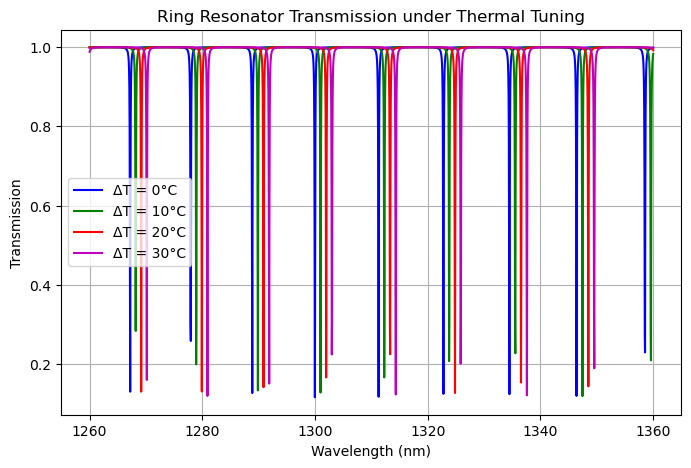

In [5]:
# Ring parameters (already defined)
R = 10.0              # microns
L = 2 * np.pi * R
neff = 2.4
a = 0.99
k = 0.2
t = np.sqrt(1 - k**2)
lambdas = np.linspace(1.26, 1.36, 2000)

# Thermo-optic coefficient of silicon
dn_dT = 1.86e-4  # per degree Celsius

# Heater temperature changes (ΔT)
delta_T = [0, 10, 20, 30]  # in °C
colors = ['b','g','r','m']

plt.figure(figsize=(8,5))
for i, dT in enumerate(delta_T):
    neff_tuned = neff + dn_dT * dT
    phi = 2 * np.pi * neff_tuned * L / lambdas
    T_tuned = np.abs((t - a*np.exp(-1j*phi)) / (1 - a*t*np.exp(-1j*phi)))**2
    plt.plot(lambdas*1000, T_tuned, color=colors[i], label=f'ΔT = {dT}°C')

plt.xlabel("Wavelength (nm)")
plt.ylabel("Transmission")
plt.title("Ring Resonator Transmission under Thermal Tuning")
plt.grid(True)
plt.legend()
plt.show()

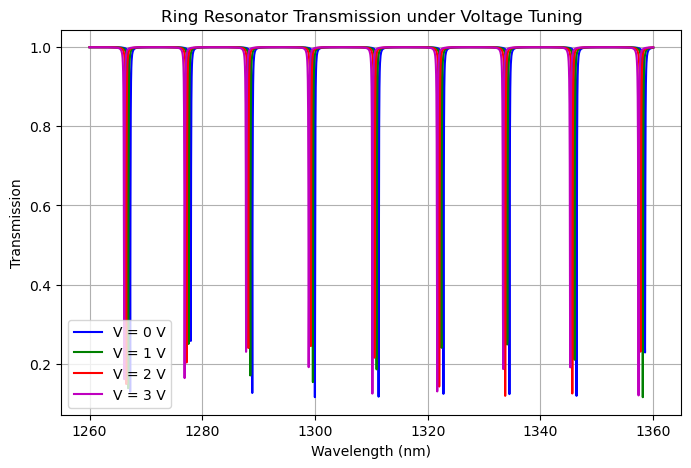

In [6]:


# Voltage sweep for PN junction
voltages = [0, 1, 2, 3]   # Volts
delta_n_max = -0.002       # max index change at 3 V

plt.figure(figsize=(8,5))
colors = ['b','g','r','m']

for i, V in enumerate(voltages):
    # Linear approximation: Δn vs V
    neff_tuned = neff + (V/3)*delta_n_max
    phi = 2 * np.pi * neff_tuned * L / lambdas
    T_tuned = np.abs((t - a*np.exp(-1j*phi)) / (1 - a*t*np.exp(-1j*phi)))**2
    plt.plot(lambdas*1000, T_tuned, color=colors[i], label=f'V = {V} V')

plt.xlabel("Wavelength (nm)")
plt.ylabel("Transmission")
plt.title("Ring Resonator Transmission under Voltage Tuning")
plt.grid(True)
plt.legend()
plt.show()

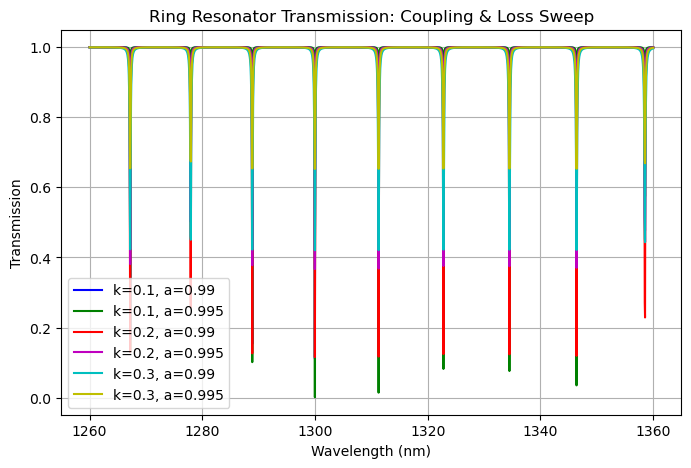

In [7]:

# Parameters to sweep
k_values = [0.1, 0.2, 0.3]  # coupling coefficients
a_values = [0.99, 0.995]    # round-trip amplitude losses

plt.figure(figsize=(8,5))
colors = ['b','g','r','m','c','y','k']

for i, k_sweep in enumerate(k_values):
    for j, a_sweep in enumerate(a_values):
        t_sweep = np.sqrt(1 - k_sweep**2)
        phi = 2 * np.pi * neff * L / lambdas  # baseline phi
        T_sweep = np.abs((t_sweep - a_sweep*np.exp(-1j*phi)) / (1 - a_sweep*t_sweep*np.exp(-1j*phi)))**2
        label = f"k={k_sweep}, a={a_sweep}"
        plt.plot(lambdas*1000, T_sweep, color=colors[(i*len(a_values)+j)%len(colors)], label=label)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Transmission")
plt.title("Ring Resonator Transmission: Coupling & Loss Sweep")
plt.grid(True)
plt.legend()
plt.show()

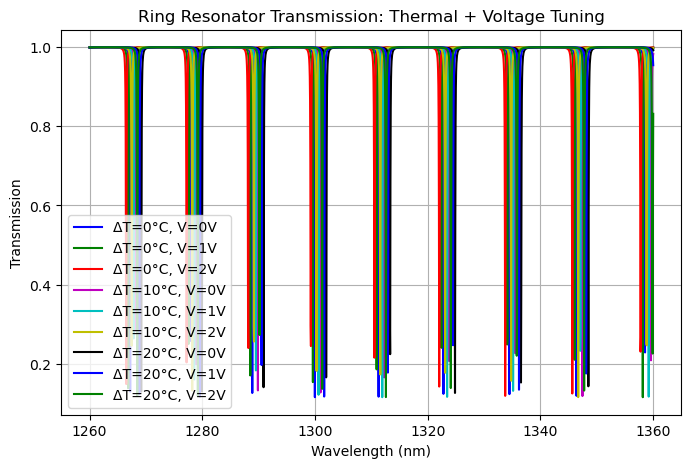

In [8]:

# Thermal + Voltage Tuning Parameters
delta_T = [0, 10, 20]       # Temperature change in °C
voltages = [0, 1, 2]        # Voltage in V
dn_dT = 1.86e-4             # Thermo-optic coefficient (per °C)
delta_n_max = -0.002         # max index change at 3 V

plt.figure(figsize=(8,5))

colors = ['b', 'g', 'r', 'm', 'c', 'y', 'k']  # up to 7 combinations

for i, dT in enumerate(delta_T):
    for j, V in enumerate(voltages):
        # Combined index shift
        neff_tuned = neff + dn_dT*dT + (V/3)*delta_n_max
        phi = 2 * np.pi * neff_tuned * L / lambdas
        T_tuned = np.abs((t - a*np.exp(-1j*phi)) / (1 - a*t*np.exp(-1j*phi)))**2
        label = f"ΔT={dT}°C, V={V}V"
        plt.plot(lambdas*1000, T_tuned, color=colors[(i*len(voltages)+j)%len(colors)], label=label)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Transmission")
plt.title("Ring Resonator Transmission: Thermal + Voltage Tuning")
plt.grid(True)
plt.legend()
plt.show()

/home/zagros/anaconda3/envs/photonics/lib/python3.11/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/zagros/anaconda3/envs/photonics/lib/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


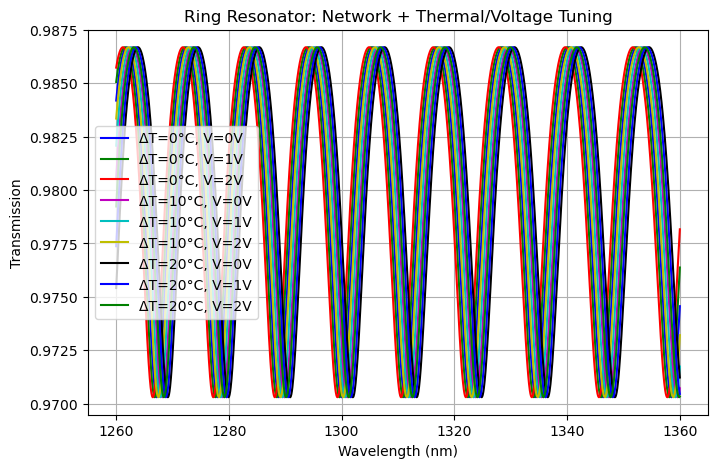

In [9]:


# Assume lambdas, neff, L, a, t are already defined from your previous code

# Compute S-matrix for the ring (through-port and drop-port)
# Since we only simulated through-port, we'll create a simple 2x2 S-matrix
# s[0,0] = reflection (assume 0)
# s[1,1] = reflection (assume 0)
# s[0,1] = drop-port (assume 1 - T)
# s[1,0] = through-port (T)

s_matrix = np.zeros((2,2,len(lambdas)), dtype=complex)
s_matrix[0,0,:] = 0.0           # reflection port 1
s_matrix[1,1,:] = 0.0           # reflection port 2
s_matrix[1,0,:] = T             # through port
s_matrix[0,1,:] = 1 - T         # drop port (simplified)

# Create a Network object
ring_network = Network(lambdas, s_matrix)



# Create the base Network
ring_net = Network(
    wavelengths=lambdas,
    s_matrix=s_matrix,
    neff=neff,
    L=L
)

# Define thermal and voltage sweeps
delta_T = [0, 10, 20]       # °C
voltages = [0, 1, 2]        # V
colors = ['b', 'g', 'r', 'm', 'c', 'y', 'k']

plt.figure(figsize=(8,5))

for i, dT in enumerate(delta_T):
    for j, V in enumerate(voltages):
        # Get a tuned network
        tuned_net = ring_net.tune_thermal_voltage(delta_T=dT, V=V)
        # Plot through-port transmission
        plt.plot(
            lambdas*1000,
            tuned_net.s[1,0,:],
            color=colors[(i*len(voltages)+j) % len(colors)],
            label=f"ΔT={dT}°C, V={V}V"
        )

plt.xlabel("Wavelength (nm)")
plt.ylabel("Transmission")
plt.title("Ring Resonator: Network + Thermal/Voltage Tuning")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
import sax
device = sax.Device(
    component=ring,
    ports=["o1", "o2"],  # typical default ports in ubcpdk rings
    wavelengths=wavelengths
)

AttributeError: module 'sax' has no attribute 'Device'